In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from tqdm import tqdm
import copy
import time
from scipy.optimize import curve_fit
options = Options()
options.nsteps = 100000

C:\Users\vvv\Anaconda2\envs\quantum\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in divide
  
C:\Users\vvv\Anaconda2\envs\quantum\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in power
  


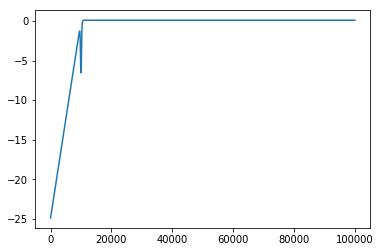

In [58]:
tt = np.linspace(0,100,100000)

span = 25.0
det = 0.1
tramp = 10
tramp = 10
slewrate = span/tramp
plt.plot(slewrate*tt*(np.exp(-(tt/tramp)**100))+slewrate*tramp*(np.exp(-(tramp/tt)**100)-1)+det)

C:\Users\vvv\Anaconda2\envs\quantum\lib\site-packages\Cython\Compiler\Main.py:367: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: Q:\NMR_meeting\Javid\Rapid Adiabatic Passage\rhs1750818.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


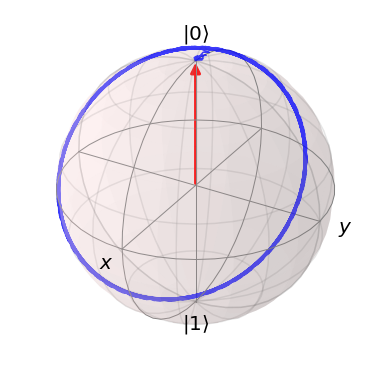

In [56]:
#Hamiltonian
X = sigmax()
Y = sigmay()
Z = sigmaz()


s1= basis(2,0) #initial state
c_ops = [] #colapse operators
e_ops=[]  #[X,Y,Z] #expectation values to measure
allStates=[s1*s1.dag()] # array of all intermidiate states 
allTimes=[] # array of times

# ======================
omega_r = 3.0 #Rabi Frequency
 #Parameter responsible for asymtry of the scanning range (span)
span = 10*np.pi*omega_r # scanning range, should be >>omega_r for nice Fidelity

tramp = time*0.0
slew_rate = span/tramp # rate of frequency sweeps, should be <<omega_r for nice Fidelity


tlist = np.linspace(0,time,200) # list of times for which we want to evaluate
  
detuning_dependence = 'slewrate*t*(exp(-(t/tramp)**10000))+slewrate*tramp*(exp(-(tramp/t)**10000)-1)+det' # time dependence of the detuning part of Hamiltonian

H0 = Z 
det = 3.0
H_MW_exc = [[H0,detuning_dependence], [X,'omega_r'] ]
args = {'slewrate':slew_rate, 'span':span, 'omega_r':omega_r,'tramp':tramp, 'det':det}

options.rhs_reuse = False
output = mesolve(H_MW_exc, fock_dm(2,0), tlist, c_ops, e_ops, args =args,  options=options)    

#plot of the Bloch Sphere
sphere=Bloch()
sphere.add_points([
    expect(output.states,X),
    expect(output.states,Y),
    expect(output.states,Z)
], meth='l')
sphere.vector_color = ['r']
sphere.add_vectors([expect(output.states[0],X),
                    expect(output.states[0],Y),
                    expect(output.states[0],Z)])
sphere.show()

# plot of the spin projection to z-axis
espin = expect(output.states,Z)

C:\Users\vvv\Anaconda2\envs\quantum\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vvv\Anaconda2\envs\quantum\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


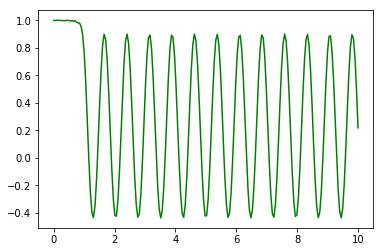

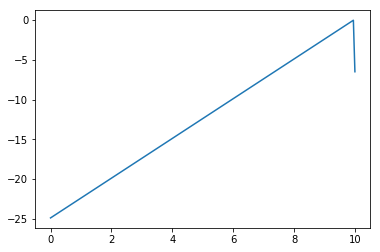

In [59]:
plt.plot(tlist, espin, 'g');
plt.figure()
plt.plot(tlist, slewrate*tlist*(np.exp(-(tlist/tramp)**10000))+slewrate*tramp*(np.exp(-(tramp/tlist)**10000)-1)+det)